# Other kind of plots interesting to use

In [1]:
import os
# fix root path to save outputs
actual_path = os.path.abspath(os.getcwd())
list_root_path = actual_path.split('\\')[:-1]
root_path = '\\'.join(list_root_path)
os.chdir(root_path)
print('root path: ', root_path)

root path:  D:\github-mi-repo\exploratory-data-analysis


### 0. Package and load data

In [2]:
from sklearn.datasets import fetch_california_housing
import json
import pandas as pd
import numpy as np

# plotly
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

## 1. Part to Whole Charts - Pie charts
https://plotly.com/python/pie-charts/

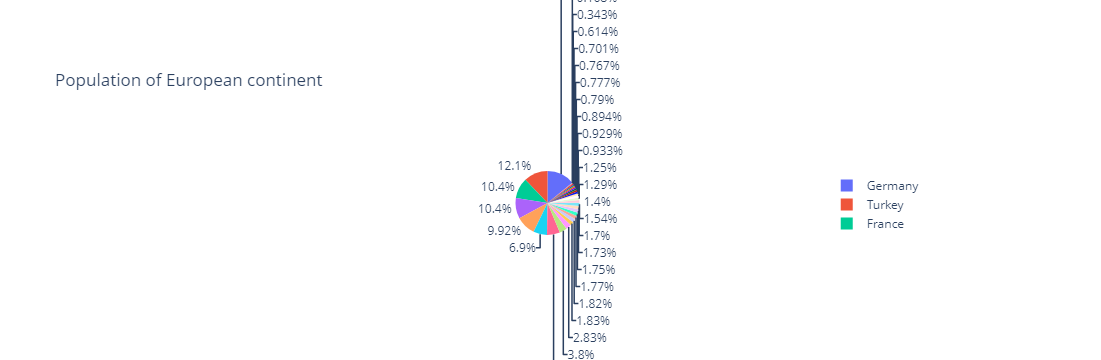

In [3]:
df = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
df.loc[df['pop'] < 2.e6, 'country'] = 'Other countries' # Represent only large countries
fig = px.pie(df, values='pop', names='country', title='Population of European continent')
fig.show()

##  2. Sunburst charts
https://plotly.com/python/sunburst-charts/

In [4]:
df = px.data.gapminder().query("year == 2007")
df.head()

country continent  year  lifeExp       pop     gdpPercap iso_alpha  \
11  Afghanistan      Asia  2007   43.828  31889923    974.580338       AFG   
23      Albania    Europe  2007   76.423   3600523   5937.029526       ALB   
35      Algeria    Africa  2007   72.301  33333216   6223.367465       DZA   
47       Angola    Africa  2007   42.731  12420476   4797.231267       AGO   
59    Argentina  Americas  2007   75.320  40301927  12779.379640       ARG   

    iso_num  
11        4  
23        8  
35       12  
47       24  
59       32

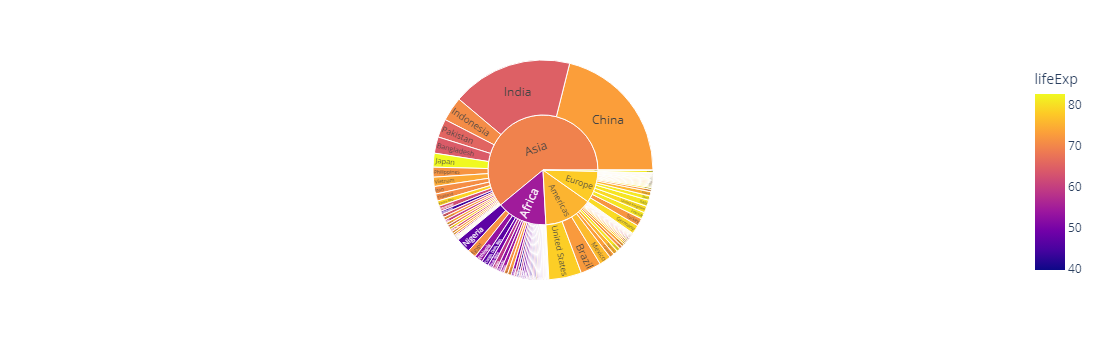

In [5]:
fig = px.sunburst(df, path=['continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'])
fig.show()

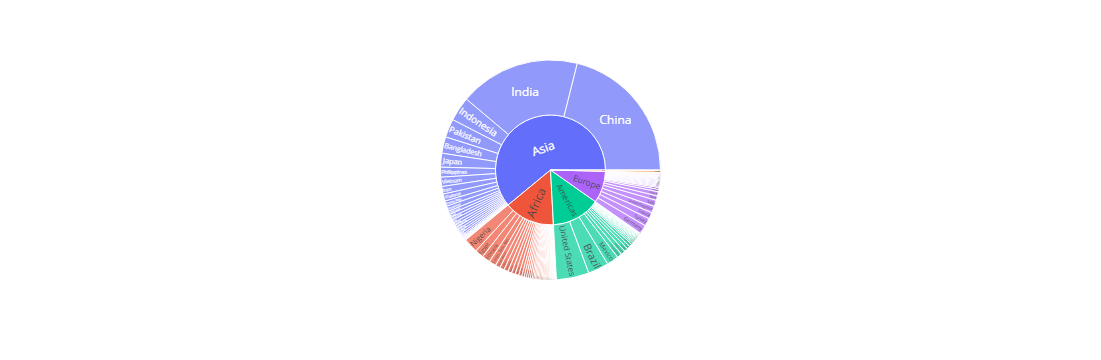

In [6]:
fig = px.sunburst(df, path=['continent', 'country'], values='pop')
fig.show()

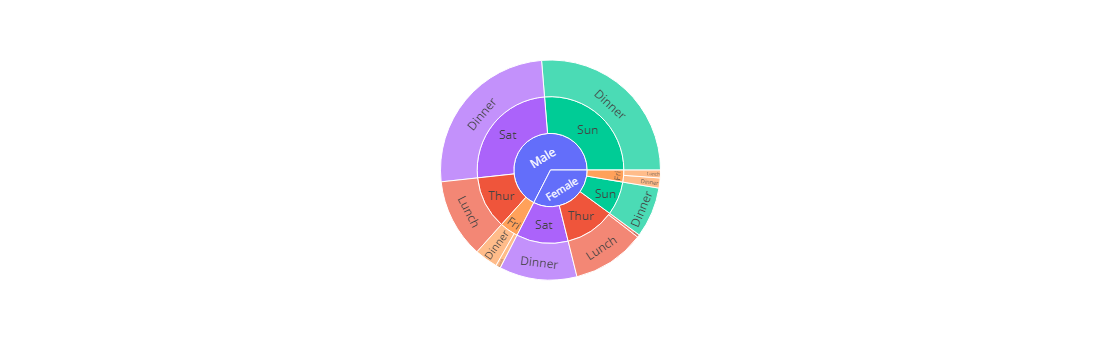

In [7]:
df = px.data.tips()
fig = px.sunburst(df, path=['sex', 'day', 'time'], values='total_bill', color='day')
fig.show()

## 3. facet plots (kind of subplots)
Plotly express can't do subplots, so facetplots is a similar option

https://plotly.com/python/facet-plots/

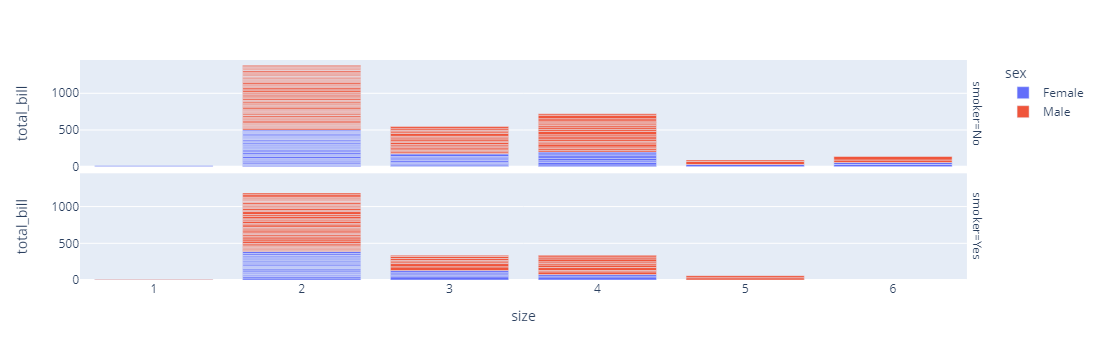

In [8]:
df = px.data.tips()
fig = px.bar(df, x="size", y="total_bill", color="sex", facet_row="smoker")
fig.show()

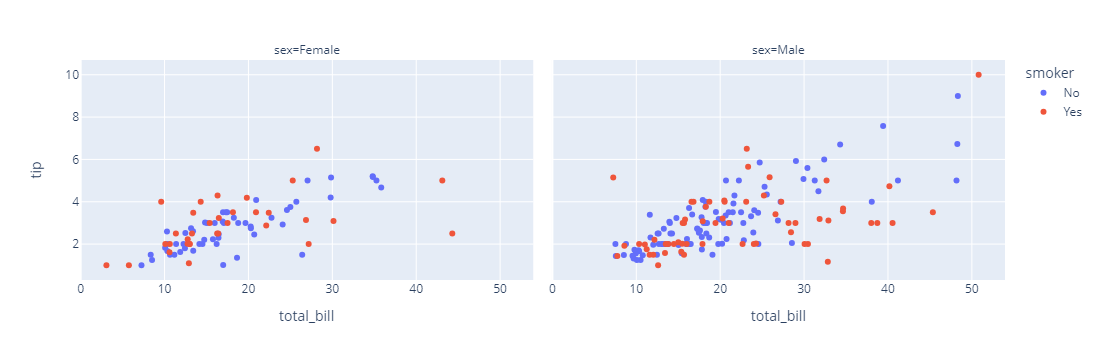

In [9]:
df = px.data.tips()
fig = px.scatter(df, x="total_bill", y="tip", color="smoker", facet_col="sex")
fig.show()

## 4. Tree maps

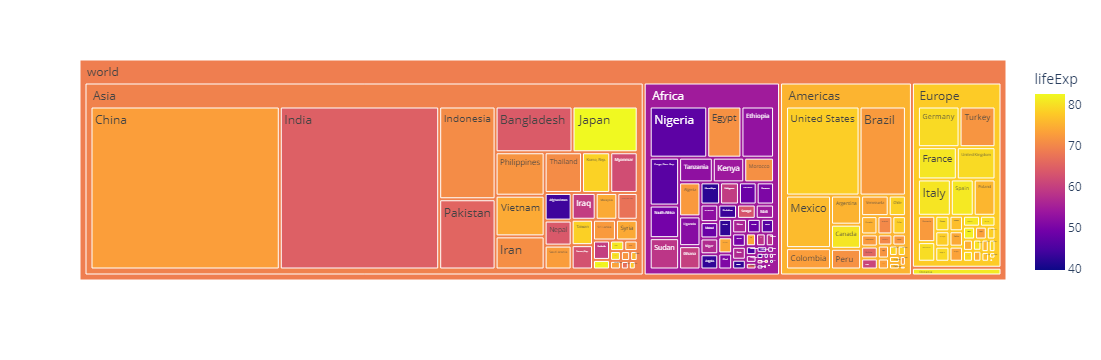

In [10]:
df = px.data.gapminder().query("year == 2007")
fig = px.treemap(df, path=[px.Constant('world'), 'continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'])
fig.show()

## 5. icicle charts 

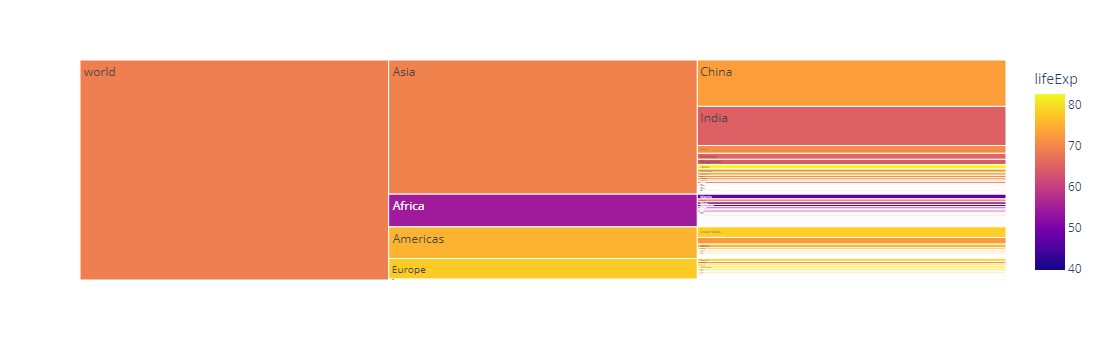

In [11]:
df = px.data.gapminder().query("year == 2007")
fig = px.icicle(df, path=[px.Constant('world'), 'continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'])
fig.show()

## 6. Density heatmap 2d histogram
https://plotly.com/python/2D-Histogram/()

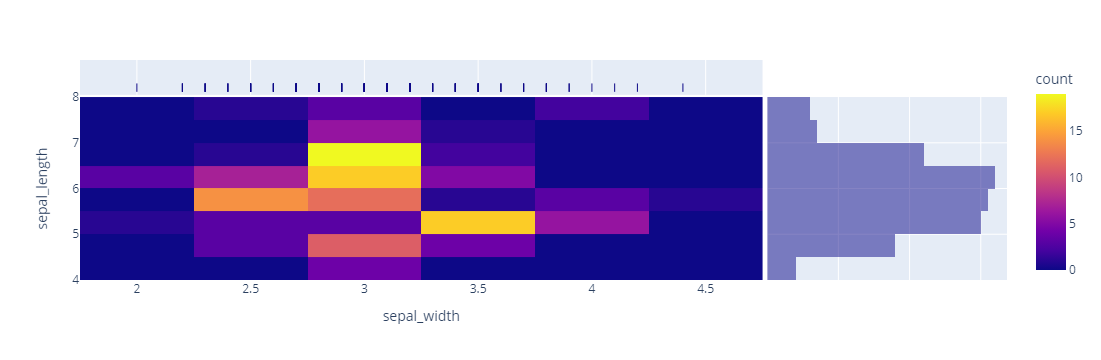

In [12]:
df = px.data.iris()
fig = px.density_heatmap(df, x="sepal_width", y="sepal_length", marginal_x="rug", marginal_y="histogram")
fig.show()

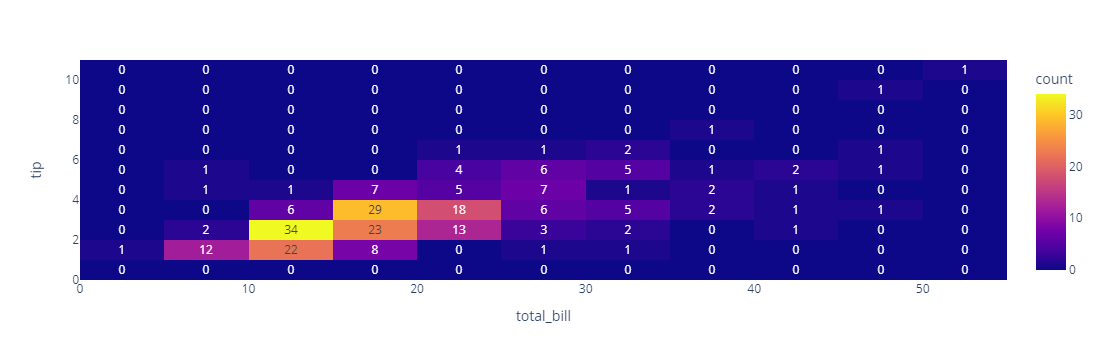

In [13]:
df = px.data.tips()

fig = px.density_heatmap(df, x="total_bill", y="tip", text_auto=True)
fig.show()

### 7. Polar coordinates
https://plotly.com/python/polar-chart/

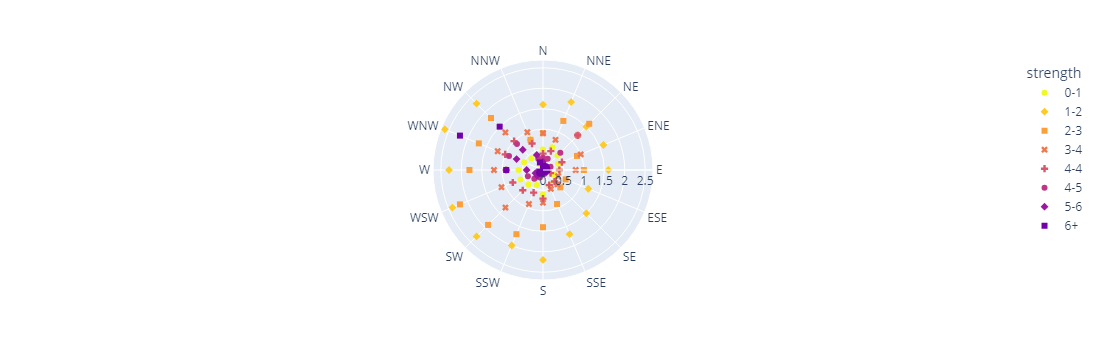

In [14]:
df = px.data.wind()
fig = px.scatter_polar(df, r="frequency", theta="direction", color="strength", symbol="strength",
            color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.show()

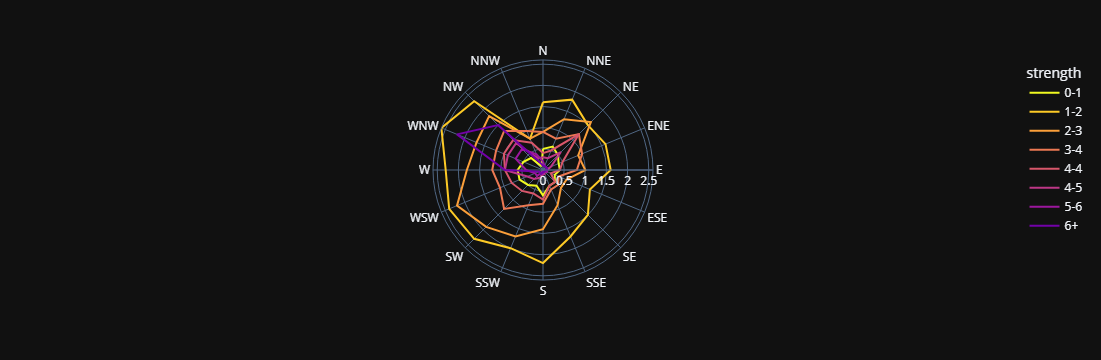

In [15]:
fig = px.line_polar(df, r="frequency", theta="direction", color="strength", line_close=True,
                    color_discrete_sequence=px.colors.sequential.Plasma_r,
                    template="plotly_dark",)
fig.show()

In [16]:
df = px.data.wind()
fig = px.line_polar(df, r="frequency", theta="direction", color="strength", line_close=True,
            color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.show()

###  8. Radar charts / spider plot
https://plotly.com/python/radar-chart/

In [17]:
df = pd.DataFrame(dict(
    r=[1, 5, 2, 2, 3],
    theta=['processing cost','mechanical properties','chemical stability',
           'thermal stability', 'device integration']))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()

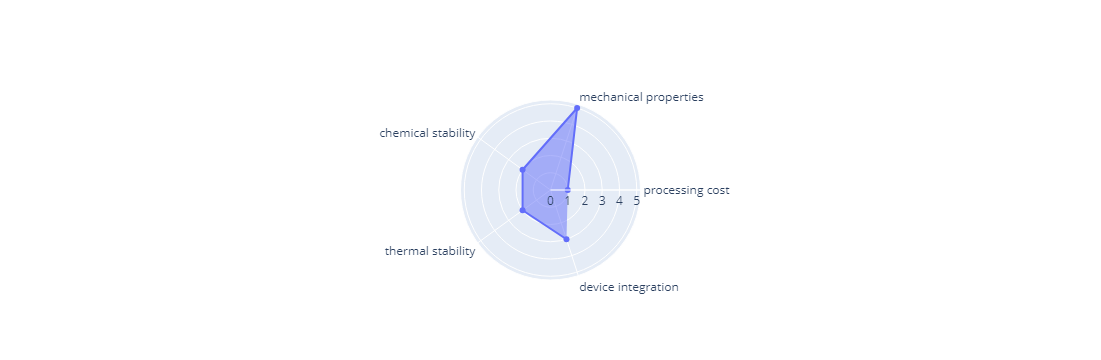

In [18]:
fig = go.Figure(data=go.Scatterpolar(
  r=[1, 5, 2, 2, 3],
  theta=['processing cost','mechanical properties','chemical stability', 'thermal stability',
           'device integration'],
  fill='toself'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    ),
  ),
  showlegend=False
)

fig.show()

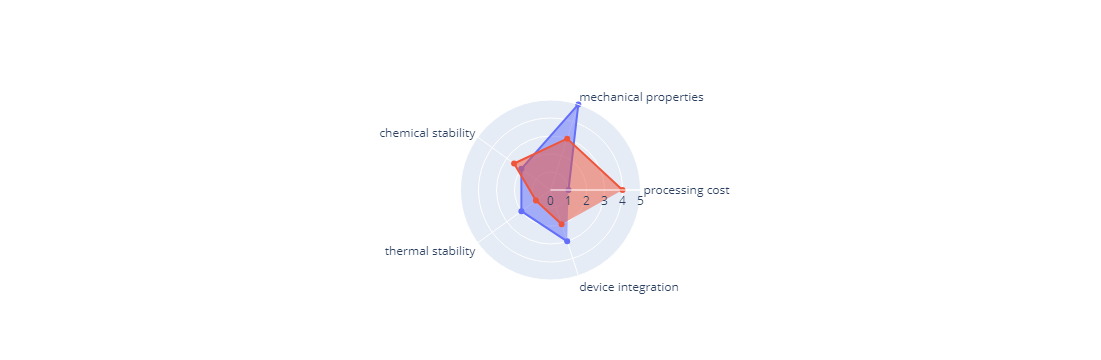

In [19]:
categories = ['processing cost','mechanical properties','chemical stability',
              'thermal stability', 'device integration']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[1, 5, 2, 2, 3],
      theta=categories,
      fill='toself',
      name='Product A'
))
fig.add_trace(go.Scatterpolar(
      r=[4, 3, 2.5, 1, 2],
      theta=categories,
      fill='toself',
      name='Product B'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=False
)


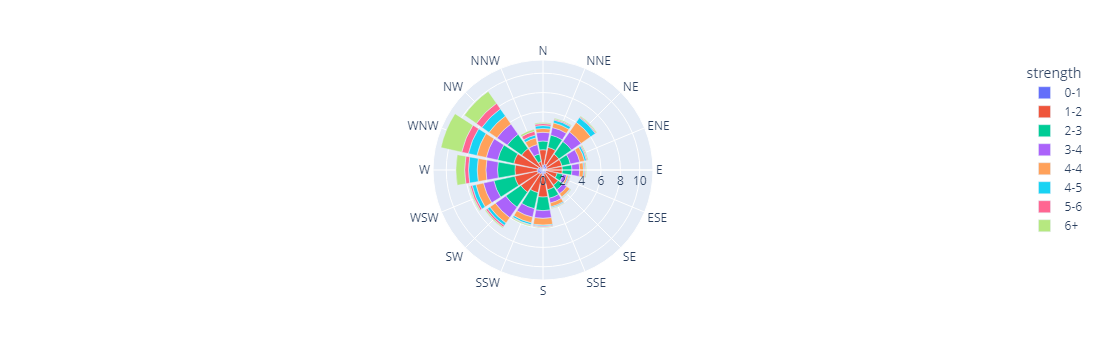

In [20]:
df = px.data.wind()
fig = px.bar_polar(df, r="frequency", theta="direction", color="strength")
fig.show()

### 9. Themes - plotly dark

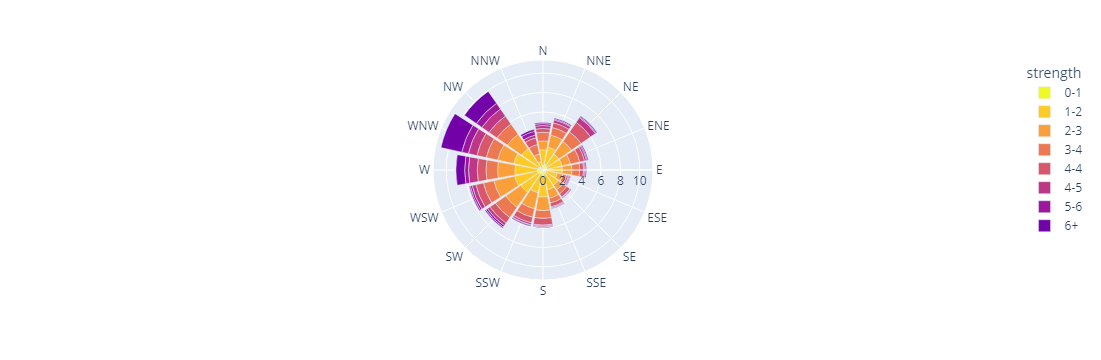

In [21]:
# theme plot
df = px.data.wind()
fig = px.bar_polar(df, r="frequency", theta="direction", color="strength",
            color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

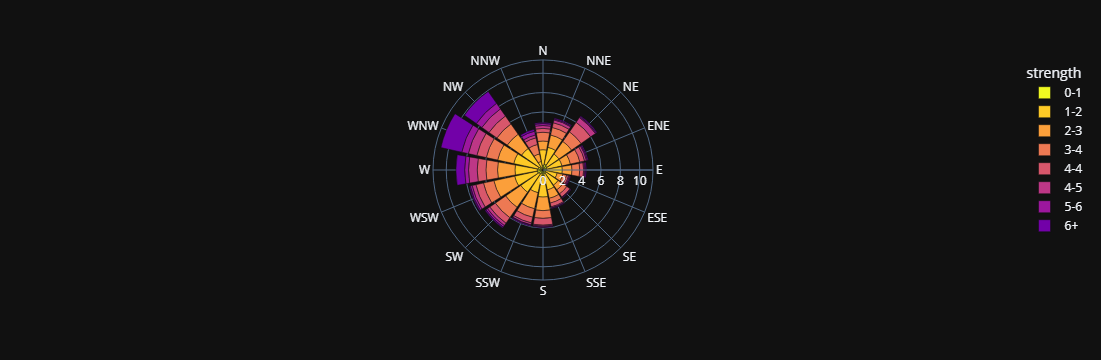

In [22]:
# theme plot and background
df = px.data.wind()
fig = px.bar_polar(df, r="frequency", theta="direction", color="strength", template="plotly_dark",
            color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()